In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape # Since it already has 4 dimensions, we do not need to reshape

(50000, 32, 32, 3)

# Data Preprocessing

In [4]:
from tensorflow.keras.utils import to_categorical

# Perform one-hot encoding
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [5]:
# Scale images by dividing them by 255

X_train = X_train / 255
X_test = X_test / 255

# Building the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(
    filters=32,
    kernel_size=(4, 4),
    input_shape=(32, 32, 3),
    activation='relu',
))

model.add(MaxPool2D(2, 2))

model.add(Conv2D(
    filters=32,
    kernel_size=(4, 4),
    input_shape=(32, 32, 3),
    activation='relu',
)) # An extra convolutional layer as images are more complex

model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2) # Could be val_accuracy too

In [9]:
model.fit(
    X_train, 
    y_cat_train, 
    epochs=15, 
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stop]
)

Epoch 1/15
1563/1563 [==============================] - 39s 24ms/step - loss: 1.5055 - accuracy: 0.4569 - val_loss: 1.2665 - val_accuracy: 0.5471
Epoch 2/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1829 - accuracy: 0.5839 - val_loss: 1.1336 - val_accuracy: 0.5982
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0352 - accuracy: 0.6339 - val_loss: 1.0596 - val_accuracy: 0.6321
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9255 - accuracy: 0.6765 - val_loss: 1.0117 - val_accuracy: 0.6519
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8300 - accuracy: 0.7108 - val_loss: 0.9651 - val_accuracy: 0.6655
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7504 - accuracy: 0.7399 - val_loss: 1.0598 - val_accuracy: 0.6444
Epoch 7/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6699 - accuracy: 0.7647 - val_loss: 1.0544 -

# Evaluating Model

In [10]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.505478,0.45694,1.266492,0.5471
1,1.182857,0.58390,1.133637,0.5982
2,1.035189,0.63390,1.059600,0.6321
3,0.925514,0.67648,1.011721,0.6519
4,0.830042,0.71078,0.965103,0.6655
5,0.750435,0.73988,1.059794,0.6444
6,0.669868,0.76468,1.054437,0.6523


<AxesSubplot:>

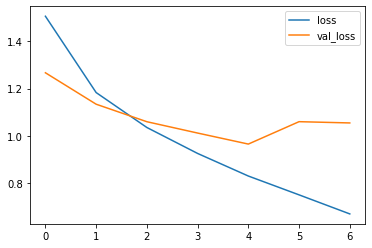

In [11]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

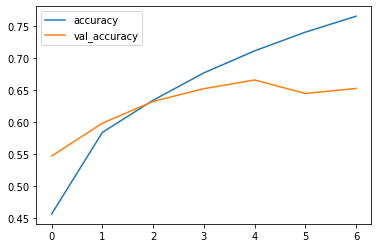

In [12]:
metrics[['accuracy', 'val_accuracy']].plot()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(X_test)

print(classification_report(y_test, predictions))

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.68      0.88      0.76      1000
           2       0.55      0.52      0.54      1000
           3       0.59      0.28      0.37      1000
           4       0.59      0.58      0.59      1000
           5       0.60      0.53      0.56      1000
           6       0.57      0.88      0.69      1000
           7       0.71      0.74      0.73      1000
           8       0.76      0.75      0.75      1000
           9       0.80      0.66      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



In [14]:
confusion_matrix(y_test, predictions)

array([[703,  70,  53,   7,  21,   3,  23,  12,  88,  20],
       [ 15, 879,   6,   2,   6,   4,  20,   3,  24,  41],
       [ 68,  20, 524,  20,  95,  61, 139,  37,  24,  12],
       [ 24,  31,  89, 275, 101, 166, 217,  61,  19,  17],
       [ 37,  10,  84,  27, 584,  32, 128,  79,  17,   2],
       [ 10,  13,  91,  95,  75, 528,  89,  71,  16,  12],
       [  4,  15,  31,  17,  23,  11, 879,   9,   7,   4],
       [ 22,   7,  41,  16,  64,  53,  24, 744,   7,  22],
       [ 86,  78,  18,   3,  11,   7,  12,   4, 752,  29],
       [ 31, 176,  19,   8,   9,  13,  19,  28,  42, 655]])

# Making Model Predict Values on Unseen Data

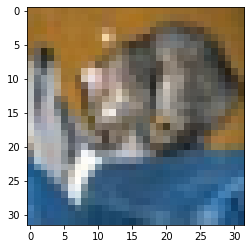

In [16]:
new_num = X_test[0]
plt.imshow(new_num)

In [17]:
model.predict_classes(new_num.reshape(1, 32, 32, 3)) # 3 refers to cat on documentation

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])